<a href="https://colab.research.google.com/github/liptiavenica/Menjelajahi-Dunia-Machine-Learning/blob/master/Bab%204/A%20-%20Clustering/1%20-%20K-means/Praktikum/Praktikum_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load Dataset

In [2]:
data = pd.read_csv("penguins.csv")
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
data.shape[0]

344

## EDA and Data Preprocessing

In [4]:
#rename columns
data.columns = ['clen', 'cdepth', 'flen', 'weight', 'sex']

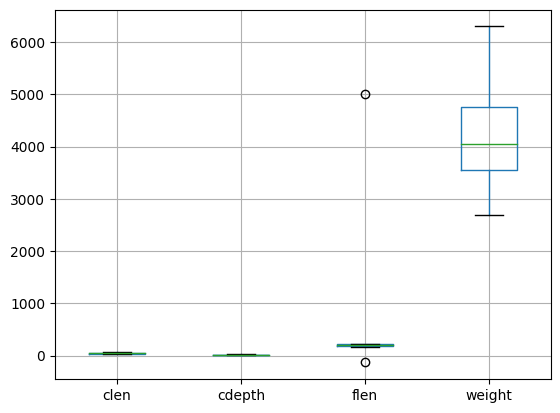

In [5]:
#memeriksa outlier
data.boxplot()
plt.show()

In [6]:
#memeriksa missing value
data.isna().sum()

clen      2
cdepth    2
flen      2
weight    2
sex       9
dtype: int64

In [7]:
# mengubah MALE menjadi 0 dan FEMALE menjadi 1
data['sex'] = data.sex.map({'MALE':0, 'FEMALE':1})
#menghilangkan missing value
data = data.dropna()
#menghilangkan 2 objek outlier
data = data.drop(data[(data['flen'] > 4000 ) | (data['flen'] < 0)].index)
data.describe()

,clen,cdepth,flen,weight,sex
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904,0.496988
std,5.452462,1.960275,14.035971,806.361278,0.500746
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.700000,17.300000,197.000000,4025.000000,0.000000
75%,48.625000,18.700000,213.000000,4781.250000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000


## Menentukan nilai k terbaik

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

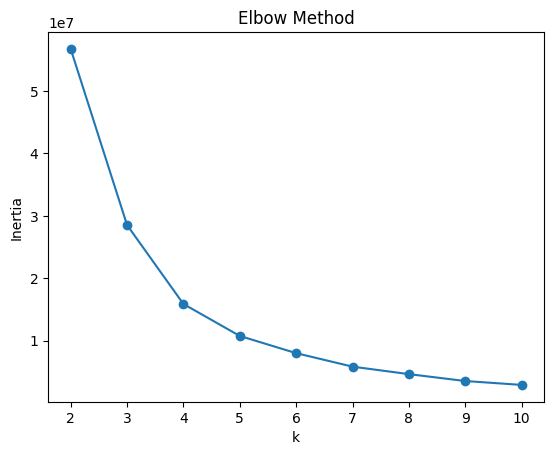

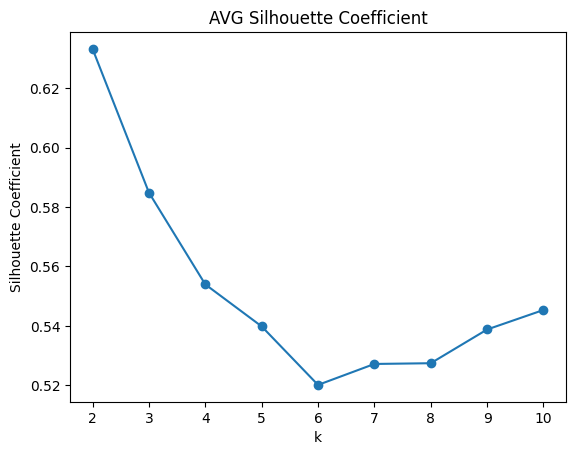

In [16]:
#mencoba beragam nilai k dari 2 hingga 10
intertia = []
silhouette_coefficients = []
K = range(2,11)
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(data.values)
    intertia.append(kmeans_model.inertia_)
    score = silhouette_score(data.values, kmeans_model.labels_,  metric='euclidean')
    silhouette_coefficients.append(score)

#visualisasi hasil elbow method
plt.plot(K, intertia, marker= "o")
plt.xlabel('k')
plt.xticks(np.arange(2, 11))
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


#visualisasi hasil perhitungan koefisien Silhouette
plt.plot(K, silhouette_coefficients, marker= "o")
plt.xlabel('k')
plt.xticks(np.arange(2, 11))
plt.ylabel("Silhouette Coefficient")
plt.title("AVG Silhouette Coefficient")
plt.show()

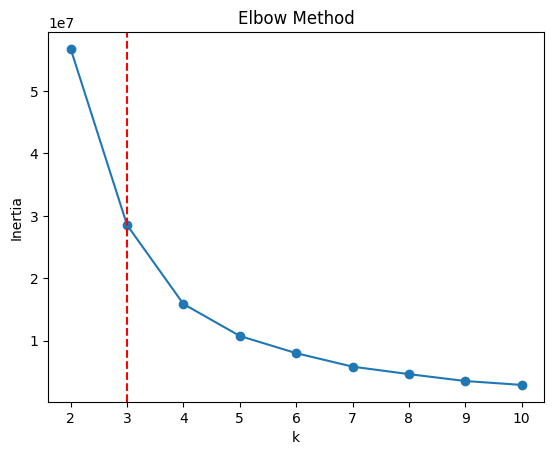

In [18]:
# prompt: which one is the elbow point?

# The elbow point is the point where the decrease in inertia starts to level off.
# In this case, the elbow point appears to be at k = 3.

plt.plot(K, intertia, marker= "o")
plt.xlabel('k')
plt.xticks(np.arange(2, 11))
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.axvline(x=3, color='r', linestyle='--')
plt.show()


In [19]:
silhouette_coefficients

[0.6332048589171703,
 0.5848382788294284,
 0.5539343114256535,
 0.5398013241891859,
 0.5200977128282113,
 0.527155693646808,
 0.5274028369743209,
 0.5387596266120893,
 0.5453226728840759]

**Diperoleh nilai k terbaik untuk mengelompokkan data penguin adalah 3**✨

## Clustering K-means dengan *k* = 3

In [25]:
# Inisialisasi model KMeans dengan 3 cluster
model = KMeans(n_clusters=3, random_state=0)

# Melatih model pada data
model.fit(data.values)

# Menambahkan label cluster pada data
data['cluster'] = model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Analisis Pola Cluster

In [36]:
# Print hasil klasterisasi
print("clen")
print(data.groupby('cluster')['clen'].describe())
print("=============")
print("cdepth")
print(data.groupby('cluster')['cdepth'].describe())
print("=============")
print("flen")
print(data.groupby('cluster')['flen'].describe())
print("=============")
print("weight")
print(data.groupby('cluster')['weight'].describe())

clen
         count       mean       std   min   25%   50%     75%   max
cluster                                                            
0        166.0  41.392771  5.427467  32.1  37.3  39.7  45.675  58.0
1         61.0  49.306557  2.840297  44.4  47.6  49.3  50.500  59.6
2        105.0  45.105714  3.824939  35.1  42.5  45.4  47.500  54.2
cdepth
         count       mean       std   min   25%   50%   75%   max
cluster                                                          
0        166.0  18.062651  1.147562  13.7  17.2  18.0  18.8  21.2
1         61.0  15.649180  0.826160  13.3  15.1  15.7  16.1  17.3
2        105.0  16.588571  2.603486  13.1  14.2  15.2  19.0  21.5
flen
         count        mean       std    min    25%    50%    75%    max
cluster                                                                
0        166.0  190.457831  6.849554  172.0  186.0  190.0  195.0  210.0
1         61.0  221.065574  6.109743  207.0  217.0  221.0  225.0  231.0
2        105.0  205.93333

In [44]:
# Create a crosstab table to see the distribution of sex within each cluster
sex_crosstab = pd.crosstab(data['cluster'], data['sex'])

# Print the crosstab table
print(sex_crosstab)


sex      0.0  1.0
cluster          
0         59  107
1         56    5
2         52   53


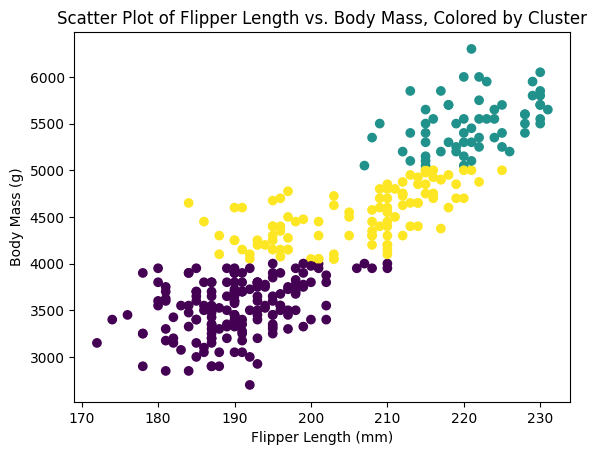

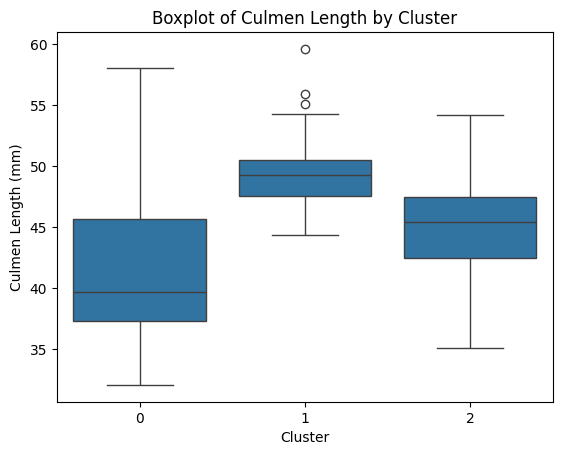

In [39]:
# Further analyze the cluster patterns by visualizing the data using scatter plots or boxplots.

# For example, you can create a scatter plot with different colors for each cluster:

plt.scatter(data['flen'], data['weight'], c=data['cluster'], cmap='viridis')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Scatter Plot of Flipper Length vs. Body Mass, Colored by Cluster')
plt.show()

# You can also create boxplots to visualize the distribution of each feature within each cluster:

sns.boxplot(x='cluster', y='clen', data=data)
plt.xlabel('Cluster')
plt.ylabel('Culmen Length (mm)')
plt.title('Boxplot of Culmen Length by Cluster')
plt.show()
